In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

#hw1
import scipy.misc
import glob
import sys

#tf_official
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.INFO)


import pandas as pd
import math
import timeit
import matplotlib.pyplot as plt
from six.moves import cPickle as pickle
import os
import platform
from subprocess import check_output

In [2]:
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))

def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']/255.0
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

In [3]:
classes = ('airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [4]:
def get_CIFAR10_data(num_training=45000, num_validation=5000, num_test=10000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'e://python3/cifar-10-batches-py/'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    
    mean_image1 = np.mean(X_train, axis=0)
    X_train -= mean_image1
    mean_image2 = np.mean(X_val, axis=0)
    X_val -= mean_image2
    mean_image3 = np.mean(X_test, axis=0)
    X_test -= mean_image3
    
    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (45000, 32, 32, 3)
Train labels shape:  (45000,)
Validation data shape:  (5000, 32, 32, 3)
Validation labels shape:  (5000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [14]:
def pre_process_image(image):
    # This function takes a single image as input,
    # and a boolean whether to build the training or testing graph.
        
        # Randomly flip the image horizontally.
    image = tf.image.random_flip_left_right(image)
    
    return image

In [16]:
def pre_process(images):
    # Use TensorFlow to loop over all the input images and call
    # the function above which takes a single image as input.
    images = tf.map_fn(lambda image: pre_process_image(image), images)

    return images

In [17]:
distorted_images1 = pre_process(images=X_train[:15000])
X_train_distorted1 = tf.Session().run(distorted_images1)

In [18]:
distorted_images2 = pre_process(images=X_train[15000:30000])
X_train_distorted2 = tf.Session().run(distorted_images2)

In [20]:
distorted_images3 = pre_process(images=X_train[30000:45000])
X_train_distorted3 = tf.Session().run(distorted_images3)

In [24]:
X_train_distorted = np.concatenate((X_train_distorted1,X_train_distorted2,X_train_distorted3))
X_train = np.concatenate((X_train, X_train_distorted))
y_train = np.concatenate((y_train,y_train))

In [25]:
print(X_train.shape, y_train.shape)

(90000, 32, 32, 3) (90000,)


In [29]:
class cnn_model():
    
    def __init__(self):
        #conv layer1 
        self.conv_W1 = tf.get_variable("conv_W1", shape = [5,5,3,64])
        self.conv_b1 = tf.get_variable("conv_b1", shape = [64])
    
        #conv layer2 
        self.conv_W2 = tf.get_variable("conv_W2", shape = [5,5,64,64])
        self.conv_b2 = tf.get_variable("conv_b2", shape = [64])
    
        #fc layer1
        self.W1 = tf.get_variable("W1", shape=[4096, 384])
        self.b1 = tf.get_variable("b1", shape=[384])
    
        #fc layer2
        self.W2 = tf.get_variable("W2", shape=[384, 192])
        self.b2 = tf.get_variable("b2", shape=[192])
        #fc layer3
        self.W3 = tf.get_variable("W3", shape=[192, 10])
        self.b3 = tf.get_variable("b3", shape=[10])
    
    def model(self, X, y, is_training):
        # conv2d1
        # maxpool1
        # Norm1
        # conv2d2
        # maxpool2
        # Norm12
        # fc1
        # fc2
        # softmax
        
        #part1
        conv1 = tf.nn.conv2d(X, self.conv_W1, strides=[1, 1, 1, 1], 
                             padding = 'SAME') + self.conv_b1
        
        relu1 = tf.nn.relu(conv1)
        
        pool1 = tf.nn.max_pool(relu1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],
                         padding='SAME', name='pool1')
        
        norm1 = tf.nn.lrn(pool1, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75,
                    name='norm1')

        #part2
        conv2 = tf.nn.conv2d(norm1, self.conv_W2, strides=[1, 1, 1, 1], 
                             padding = 'SAME') + self.conv_b2

        relu2 = tf.nn.relu(conv2)
        
        norm2 = tf.nn.lrn(relu2, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75,
                    name='norm2')
        
        pool2 = tf.nn.max_pool(norm2, ksize=[1, 2, 2, 1],
                         strides=[1, 2, 2, 1], padding='SAME', name='pool2')
        
        
        #part3
        pool2_flat = tf.reshape(pool2,[-1,4096])
        
        fc1 = tf.matmul(pool2_flat, self.W1) + self.b1
        bn31 = tf.layers.batch_normalization(inputs=fc1, center=True, scale=True, training=is_training)
        relu31 = tf.nn.relu(bn31)
        drop31 = tf.layers.dropout(inputs=relu31, training=is_training)
        #relu31 = tf.nn.relu(fc1)
        
        #drop31 = tf.nn.dropout(fc1,0.0000001)   #drop out !!!!!!!!!!!!!!!!!!!!
        #pool3_flat = tf.reshape(drop31,[-1,384])
        fc2 = tf.matmul(drop31, self.W2) + self.b2
        bn32 = tf.layers.batch_normalization(inputs=fc2, center=True, scale=True, training=is_training)
        relu32 = tf.nn.relu(bn32)
        drop32 = tf.layers.dropout(inputs=relu32, training=is_training)
        
        #pool4_flat = tf.reshape(drop32,[-1,192])
        self.predict = tf.matmul(drop32, self.W3) + self.b3
        
        return self.predict

    def run(self, session, loss_val, Xd, yd,
                  epochs=1, batch_size=64, print_every=100,
                  training=None, plot_losses=False, isSoftMax=False):
        # have tensorflow compute accuracy
        if isSoftMax:
            correct_prediction = tf.nn.softmax(self.predict)
        else:
            correct_prediction = tf.equal(tf.argmax(self.predict,1), y)
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

        # shuffle indicies
        train_indicies = np.arange(Xd.shape[0])
        np.random.shuffle(train_indicies)

        training_now = training is not None

        # setting up variables we want to compute (and optimizing)
        # if we have a training function, add that to things we compute
        variables = [mean_loss, correct_prediction, accuracy]
        if training_now:
            variables[-1] = training

        # counter 
        iter_cnt = 0
        for e in range(epochs):
            # keep track of losses and accuracy
            correct = 0
            losses = []
            # make sure we iterate over the dataset once
            for i in range(int(math.ceil(Xd.shape[0]/batch_size))):
                # generate indicies for the batch
                start_idx = (i*batch_size)%Xd.shape[0]
                idx = train_indicies[start_idx:start_idx+batch_size]

                # create a feed dictionary for this batch
                feed_dict = {X: Xd[idx,:],
                             y: yd[idx],
                             is_training: training_now }
                # get batch size
                actual_batch_size = yd[idx].shape[0]

                # have tensorflow compute loss and correct predictions
                # and (if given) perform a training step
                loss, corr, _ = session.run(variables,feed_dict=feed_dict)

                # aggregate performance stats
                losses.append(loss*actual_batch_size)
                correct += np.sum(corr)

                # print every now and then
                if training_now and (iter_cnt % print_every) == 0:
                    print("Iteration {0}: with minibatch training loss = {1:.3g} and accuracy of {2:.2g}"\
                          .format(iter_cnt,loss,np.sum(corr)/actual_batch_size))
                iter_cnt += 1
            total_correct = correct/Xd.shape[0]
            total_loss = np.sum(losses)/Xd.shape[0]
            print("Epoch {2}, Overall loss = {0:.3g} and accuracy of {1:.3g}"\
                  .format(total_loss,total_correct,e+1))
            if plot_losses:
                plt.plot(losses)
                plt.grid(True)
                plt.title('Epoch {} Loss'.format(e+1))
                plt.xlabel('minibatch number')
                plt.ylabel('minibatch loss')
                plt.show()
        return total_loss, total_correct    



In [30]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, 32, 32, 3])
y = tf.placeholder(tf.int64, [None])
is_training = tf.placeholder(tf.bool)

net = cnn_model()
net.model(X,y,is_training)

<tf.Tensor 'add_4:0' shape=(?, 10) dtype=float32>

In [31]:
# Annealing the learning rate
global_step = tf.Variable(0, trainable=False)
starter_learning_rate = 1e-3
end_learning_rate = 5e-3
decay_steps = 10000

learning_rate = tf.train.polynomial_decay(starter_learning_rate, global_step,
                                          decay_steps, end_learning_rate,
                                          power=0.5)

exp_learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
                                               100000, 0.96, staircase=True)


# Feel free to play with this cell
mean_loss = None
optimizer = None

# define our loss
cross_entr_loss = tf.nn.softmax_cross_entropy_with_logits(labels=tf.one_hot(y,10), logits=net.predict)
mean_loss = tf.reduce_mean(cross_entr_loss)

# define our optimizer
optimizer = tf.train.AdamOptimizer(exp_learning_rate)


# batch normalization in tensorflow requires this extra dependency
extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(extra_update_ops):
    train_step = optimizer.minimize(mean_loss, global_step=global_step)

Training0
Iteration 0: with minibatch training loss = 3.02 and accuracy of 0.14
Iteration 100: with minibatch training loss = 1.56 and accuracy of 0.46
Iteration 200: with minibatch training loss = 1.46 and accuracy of 0.46
Iteration 300: with minibatch training loss = 1.24 and accuracy of 0.54
Iteration 400: with minibatch training loss = 1.06 and accuracy of 0.66
Epoch 1, Overall loss = 1.46 and accuracy of 0.484


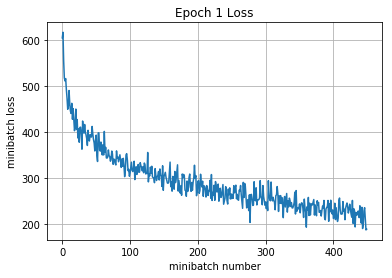

Iteration 500: with minibatch training loss = 1.2 and accuracy of 0.59
Iteration 600: with minibatch training loss = 1.05 and accuracy of 0.65
Iteration 700: with minibatch training loss = 1.03 and accuracy of 0.63
Iteration 800: with minibatch training loss = 0.973 and accuracy of 0.67
Epoch 2, Overall loss = 1.02 and accuracy of 0.638


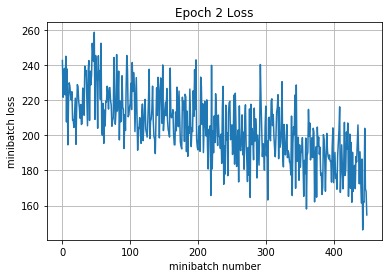

Iteration 900: with minibatch training loss = 1.02 and accuracy of 0.65
Iteration 1000: with minibatch training loss = 0.883 and accuracy of 0.69
Iteration 1100: with minibatch training loss = 0.765 and accuracy of 0.71
Iteration 1200: with minibatch training loss = 0.852 and accuracy of 0.72
Iteration 1300: with minibatch training loss = 0.756 and accuracy of 0.73
Epoch 3, Overall loss = 0.865 and accuracy of 0.697


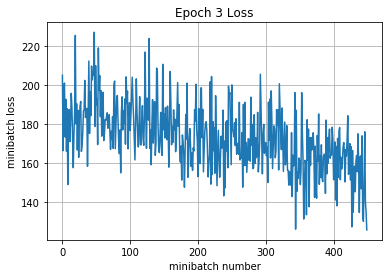

Iteration 1400: with minibatch training loss = 0.803 and accuracy of 0.71
Iteration 1500: with minibatch training loss = 0.775 and accuracy of 0.74
Iteration 1600: with minibatch training loss = 0.753 and accuracy of 0.73
Iteration 1700: with minibatch training loss = 0.734 and accuracy of 0.72
Epoch 4, Overall loss = 0.756 and accuracy of 0.736


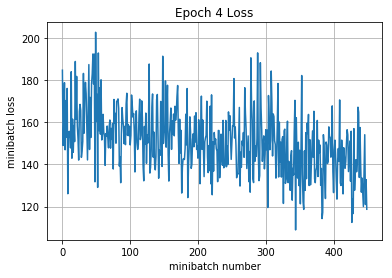

Iteration 1800: with minibatch training loss = 0.711 and accuracy of 0.77
Iteration 1900: with minibatch training loss = 0.621 and accuracy of 0.78
Iteration 2000: with minibatch training loss = 0.55 and accuracy of 0.79
Iteration 2100: with minibatch training loss = 0.682 and accuracy of 0.76
Iteration 2200: with minibatch training loss = 0.601 and accuracy of 0.76
Epoch 5, Overall loss = 0.665 and accuracy of 0.768


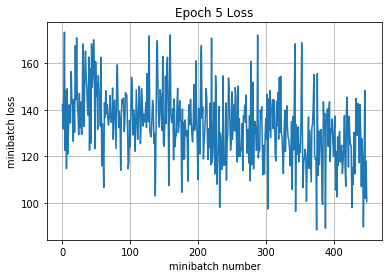

Validation0
Epoch 1, Overall loss = 0.703 and accuracy of 0.755
Training1
Iteration 0: with minibatch training loss = 0.59 and accuracy of 0.78
Iteration 100: with minibatch training loss = 0.555 and accuracy of 0.81
Iteration 200: with minibatch training loss = 0.498 and accuracy of 0.82
Iteration 300: with minibatch training loss = 0.66 and accuracy of 0.77
Iteration 400: with minibatch training loss = 0.648 and accuracy of 0.78
Epoch 1, Overall loss = 0.6 and accuracy of 0.79


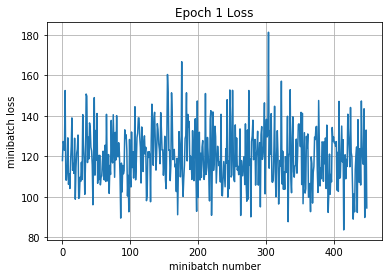

Iteration 500: with minibatch training loss = 0.559 and accuracy of 0.81
Iteration 600: with minibatch training loss = 0.498 and accuracy of 0.82
Iteration 700: with minibatch training loss = 0.591 and accuracy of 0.8
Iteration 800: with minibatch training loss = 0.55 and accuracy of 0.8
Epoch 2, Overall loss = 0.523 and accuracy of 0.818


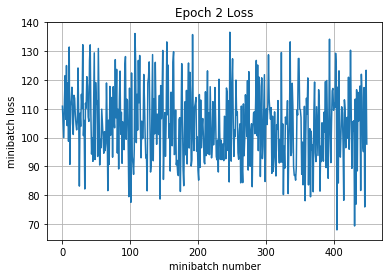

Iteration 900: with minibatch training loss = 0.443 and accuracy of 0.87
Iteration 1000: with minibatch training loss = 0.434 and accuracy of 0.83
Iteration 1100: with minibatch training loss = 0.442 and accuracy of 0.84
Iteration 1200: with minibatch training loss = 0.512 and accuracy of 0.83
Iteration 1300: with minibatch training loss = 0.43 and accuracy of 0.85
Epoch 3, Overall loss = 0.457 and accuracy of 0.841


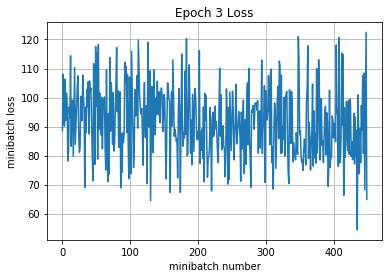

Iteration 1400: with minibatch training loss = 0.458 and accuracy of 0.85
Iteration 1500: with minibatch training loss = 0.428 and accuracy of 0.84
Iteration 1600: with minibatch training loss = 0.437 and accuracy of 0.87
Iteration 1700: with minibatch training loss = 0.348 and accuracy of 0.87
Epoch 4, Overall loss = 0.402 and accuracy of 0.861


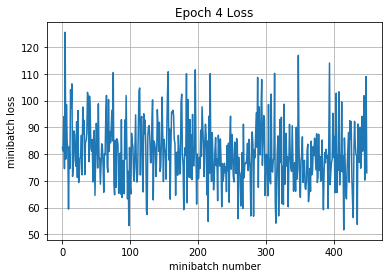

Iteration 1800: with minibatch training loss = 0.371 and accuracy of 0.85
Iteration 1900: with minibatch training loss = 0.286 and accuracy of 0.91
Iteration 2000: with minibatch training loss = 0.334 and accuracy of 0.88
Iteration 2100: with minibatch training loss = 0.387 and accuracy of 0.84
Iteration 2200: with minibatch training loss = 0.322 and accuracy of 0.89
Epoch 5, Overall loss = 0.351 and accuracy of 0.877


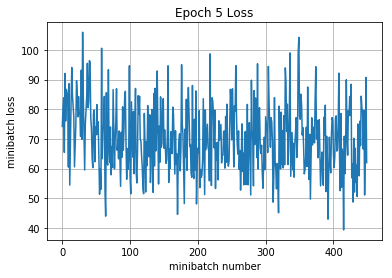

Validation1
Epoch 1, Overall loss = 0.723 and accuracy of 0.779
Training2
Iteration 0: with minibatch training loss = 0.292 and accuracy of 0.89
Iteration 100: with minibatch training loss = 0.295 and accuracy of 0.9
Iteration 200: with minibatch training loss = 0.379 and accuracy of 0.87
Iteration 300: with minibatch training loss = 0.44 and accuracy of 0.85
Iteration 400: with minibatch training loss = 0.268 and accuracy of 0.9
Epoch 1, Overall loss = 0.334 and accuracy of 0.885


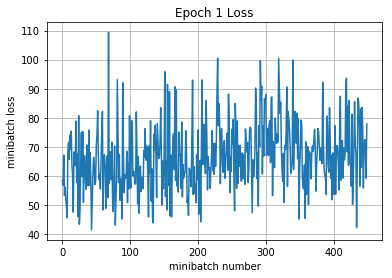

Iteration 500: with minibatch training loss = 0.274 and accuracy of 0.91
Iteration 600: with minibatch training loss = 0.283 and accuracy of 0.9
Iteration 700: with minibatch training loss = 0.324 and accuracy of 0.87
Iteration 800: with minibatch training loss = 0.295 and accuracy of 0.93
Epoch 2, Overall loss = 0.287 and accuracy of 0.9


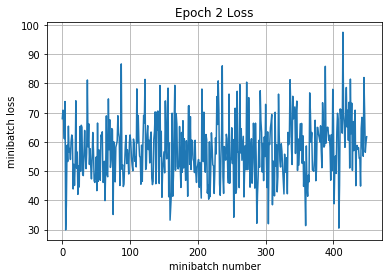

Iteration 900: with minibatch training loss = 0.326 and accuracy of 0.91
Iteration 1000: with minibatch training loss = 0.297 and accuracy of 0.92
Iteration 1100: with minibatch training loss = 0.346 and accuracy of 0.86
Iteration 1200: with minibatch training loss = 0.308 and accuracy of 0.9
Iteration 1300: with minibatch training loss = 0.229 and accuracy of 0.91
Epoch 3, Overall loss = 0.257 and accuracy of 0.911


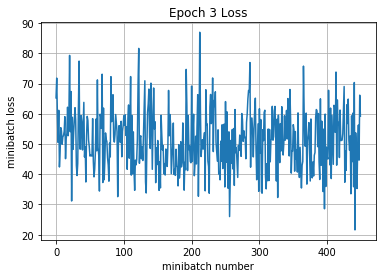

Iteration 1400: with minibatch training loss = 0.132 and accuracy of 0.96
Iteration 1500: with minibatch training loss = 0.219 and accuracy of 0.91
Iteration 1600: with minibatch training loss = 0.238 and accuracy of 0.9
Iteration 1700: with minibatch training loss = 0.245 and accuracy of 0.91
Epoch 4, Overall loss = 0.231 and accuracy of 0.921


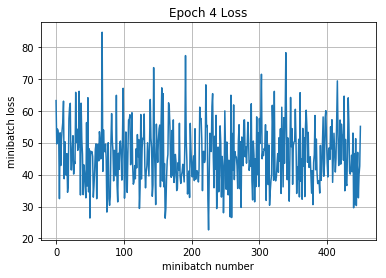

Iteration 1800: with minibatch training loss = 0.217 and accuracy of 0.91
Iteration 1900: with minibatch training loss = 0.209 and accuracy of 0.94
Iteration 2000: with minibatch training loss = 0.189 and accuracy of 0.94
Iteration 2100: with minibatch training loss = 0.307 and accuracy of 0.89
Iteration 2200: with minibatch training loss = 0.182 and accuracy of 0.93
Epoch 5, Overall loss = 0.21 and accuracy of 0.927


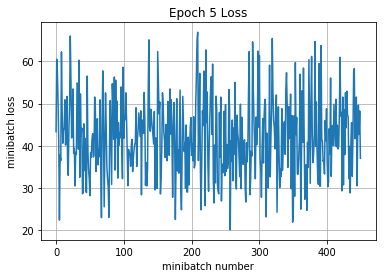

Validation2
Epoch 1, Overall loss = 0.818 and accuracy of 0.774
Training3
Iteration 0: with minibatch training loss = 0.195 and accuracy of 0.94
Iteration 100: with minibatch training loss = 0.123 and accuracy of 0.95
Iteration 200: with minibatch training loss = 0.19 and accuracy of 0.94
Iteration 300: with minibatch training loss = 0.186 and accuracy of 0.94
Iteration 400: with minibatch training loss = 0.247 and accuracy of 0.93
Epoch 1, Overall loss = 0.207 and accuracy of 0.929


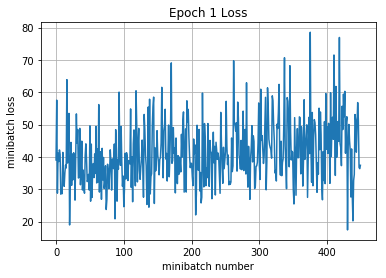

Iteration 500: with minibatch training loss = 0.19 and accuracy of 0.95
Iteration 600: with minibatch training loss = 0.139 and accuracy of 0.96
Iteration 700: with minibatch training loss = 0.189 and accuracy of 0.95
Iteration 800: with minibatch training loss = 0.208 and accuracy of 0.94
Epoch 2, Overall loss = 0.183 and accuracy of 0.938


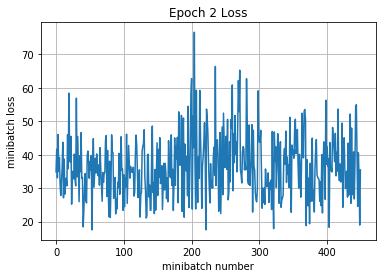

Iteration 900: with minibatch training loss = 0.184 and accuracy of 0.94
Iteration 1000: with minibatch training loss = 0.173 and accuracy of 0.94
Iteration 1100: with minibatch training loss = 0.154 and accuracy of 0.94
Iteration 1200: with minibatch training loss = 0.144 and accuracy of 0.95
Iteration 1300: with minibatch training loss = 0.157 and accuracy of 0.95
Epoch 3, Overall loss = 0.169 and accuracy of 0.942


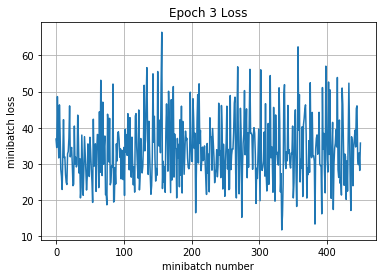

Iteration 1400: with minibatch training loss = 0.166 and accuracy of 0.95
Iteration 1500: with minibatch training loss = 0.168 and accuracy of 0.94
Iteration 1600: with minibatch training loss = 0.194 and accuracy of 0.94
Iteration 1700: with minibatch training loss = 0.134 and accuracy of 0.95
Epoch 4, Overall loss = 0.152 and accuracy of 0.949


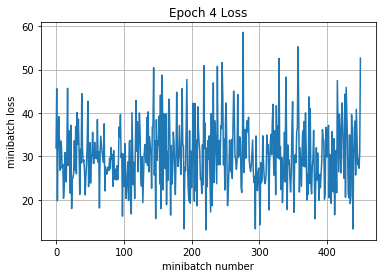

Iteration 1800: with minibatch training loss = 0.189 and accuracy of 0.93
Iteration 1900: with minibatch training loss = 0.0982 and accuracy of 0.96
Iteration 2000: with minibatch training loss = 0.16 and accuracy of 0.94
Iteration 2100: with minibatch training loss = 0.116 and accuracy of 0.95
Iteration 2200: with minibatch training loss = 0.141 and accuracy of 0.95
Epoch 5, Overall loss = 0.151 and accuracy of 0.948


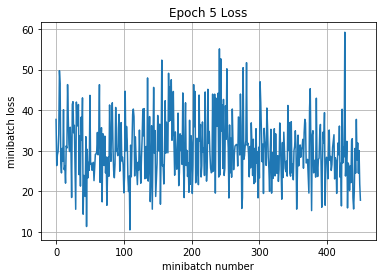

Validation3
Epoch 1, Overall loss = 0.928 and accuracy of 0.778
Training4
Iteration 0: with minibatch training loss = 0.144 and accuracy of 0.95
Iteration 100: with minibatch training loss = 0.199 and accuracy of 0.91
Iteration 200: with minibatch training loss = 0.136 and accuracy of 0.94
Iteration 300: with minibatch training loss = 0.17 and accuracy of 0.94
Iteration 400: with minibatch training loss = 0.171 and accuracy of 0.94
Epoch 1, Overall loss = 0.15 and accuracy of 0.949


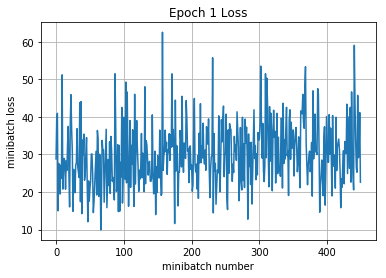

Iteration 500: with minibatch training loss = 0.114 and accuracy of 0.96
Iteration 600: with minibatch training loss = 0.184 and accuracy of 0.94
Iteration 700: with minibatch training loss = 0.191 and accuracy of 0.94
Iteration 800: with minibatch training loss = 0.161 and accuracy of 0.94
Epoch 2, Overall loss = 0.136 and accuracy of 0.953


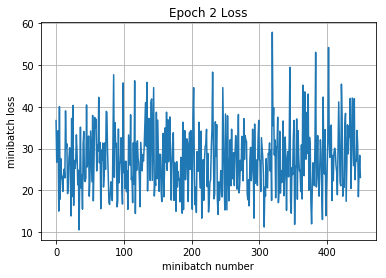

Iteration 900: with minibatch training loss = 0.109 and accuracy of 0.97
Iteration 1000: with minibatch training loss = 0.0736 and accuracy of 0.98
Iteration 1100: with minibatch training loss = 0.167 and accuracy of 0.95
Iteration 1200: with minibatch training loss = 0.0709 and accuracy of 0.98
Iteration 1300: with minibatch training loss = 0.132 and accuracy of 0.96
Epoch 3, Overall loss = 0.125 and accuracy of 0.957


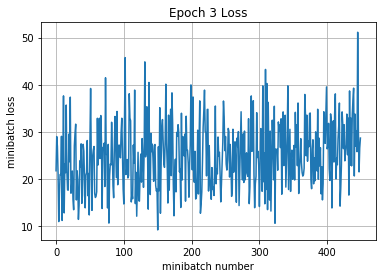

Iteration 1400: with minibatch training loss = 0.139 and accuracy of 0.96
Iteration 1500: with minibatch training loss = 0.0893 and accuracy of 0.96
Iteration 1600: with minibatch training loss = 0.0795 and accuracy of 0.97
Iteration 1700: with minibatch training loss = 0.137 and accuracy of 0.96
Epoch 4, Overall loss = 0.118 and accuracy of 0.96


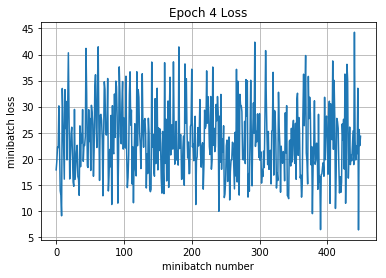

Iteration 1800: with minibatch training loss = 0.101 and accuracy of 0.97
Iteration 1900: with minibatch training loss = 0.121 and accuracy of 0.96
Iteration 2000: with minibatch training loss = 0.12 and accuracy of 0.96
Iteration 2100: with minibatch training loss = 0.105 and accuracy of 0.96
Iteration 2200: with minibatch training loss = 0.116 and accuracy of 0.95
Epoch 5, Overall loss = 0.116 and accuracy of 0.96


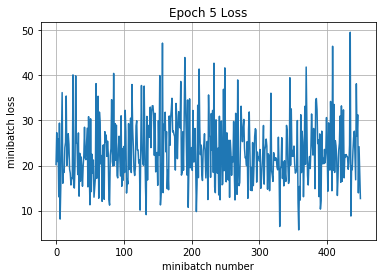

Validation4
Epoch 1, Overall loss = 1.01 and accuracy of 0.785
Training5
Iteration 0: with minibatch training loss = 0.152 and accuracy of 0.94
Iteration 100: with minibatch training loss = 0.129 and accuracy of 0.96
Iteration 200: with minibatch training loss = 0.196 and accuracy of 0.95
Iteration 300: with minibatch training loss = 0.0805 and accuracy of 0.95
Iteration 400: with minibatch training loss = 0.15 and accuracy of 0.95
Epoch 1, Overall loss = 0.126 and accuracy of 0.958


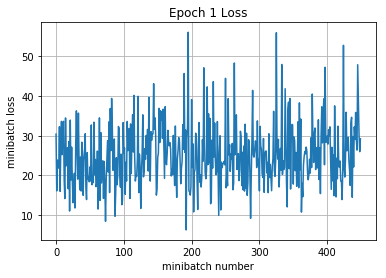

Iteration 500: with minibatch training loss = 0.0582 and accuracy of 0.97
Iteration 600: with minibatch training loss = 0.103 and accuracy of 0.96
Iteration 700: with minibatch training loss = 0.0976 and accuracy of 0.96
Iteration 800: with minibatch training loss = 0.114 and accuracy of 0.96
Epoch 2, Overall loss = 0.109 and accuracy of 0.963


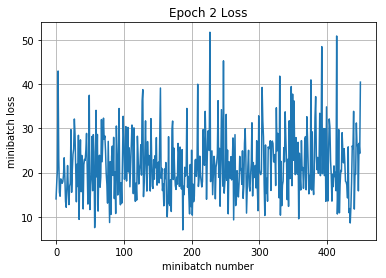

Iteration 900: with minibatch training loss = 0.13 and accuracy of 0.95
Iteration 1000: with minibatch training loss = 0.108 and accuracy of 0.97
Iteration 1100: with minibatch training loss = 0.107 and accuracy of 0.96
Iteration 1200: with minibatch training loss = 0.108 and accuracy of 0.95
Iteration 1300: with minibatch training loss = 0.0926 and accuracy of 0.96
Epoch 3, Overall loss = 0.104 and accuracy of 0.965


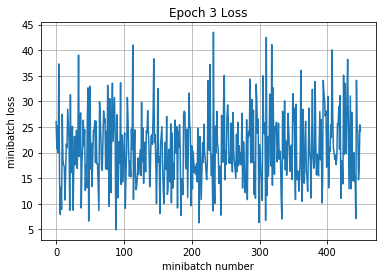

Iteration 1400: with minibatch training loss = 0.0478 and accuracy of 0.98
Iteration 1500: with minibatch training loss = 0.0995 and accuracy of 0.96
Iteration 1600: with minibatch training loss = 0.0528 and accuracy of 0.98
Iteration 1700: with minibatch training loss = 0.168 and accuracy of 0.94
Epoch 4, Overall loss = 0.1 and accuracy of 0.966


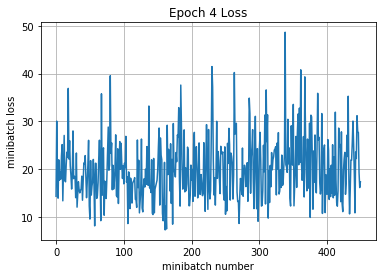

Iteration 1800: with minibatch training loss = 0.0628 and accuracy of 0.97
Iteration 1900: with minibatch training loss = 0.0631 and accuracy of 0.97
Iteration 2000: with minibatch training loss = 0.0991 and accuracy of 0.96
Iteration 2100: with minibatch training loss = 0.096 and accuracy of 0.96
Iteration 2200: with minibatch training loss = 0.0802 and accuracy of 0.98
Epoch 5, Overall loss = 0.0973 and accuracy of 0.967


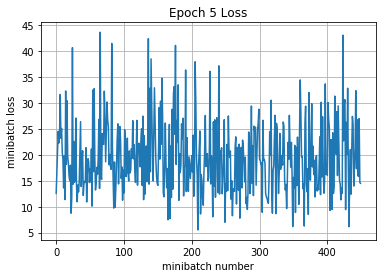

Validation5
Epoch 1, Overall loss = 1.01 and accuracy of 0.78
Training6
Iteration 0: with minibatch training loss = 0.0624 and accuracy of 0.97
Iteration 100: with minibatch training loss = 0.149 and accuracy of 0.95
Iteration 200: with minibatch training loss = 0.0812 and accuracy of 0.96
Iteration 300: with minibatch training loss = 0.0551 and accuracy of 0.98
Iteration 400: with minibatch training loss = 0.0874 and accuracy of 0.97
Epoch 1, Overall loss = 0.107 and accuracy of 0.964


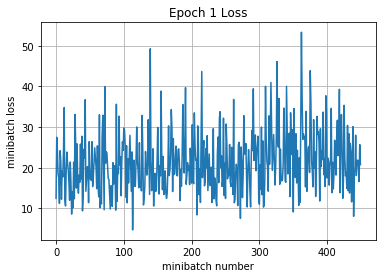

Iteration 500: with minibatch training loss = 0.121 and accuracy of 0.96
Iteration 600: with minibatch training loss = 0.0756 and accuracy of 0.97
Iteration 700: with minibatch training loss = 0.0889 and accuracy of 0.96
Iteration 800: with minibatch training loss = 0.132 and accuracy of 0.96
Epoch 2, Overall loss = 0.0954 and accuracy of 0.968


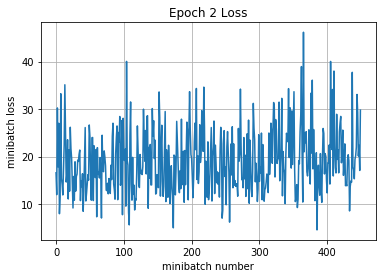

Iteration 900: with minibatch training loss = 0.0781 and accuracy of 0.96
Iteration 1000: with minibatch training loss = 0.0749 and accuracy of 0.97
Iteration 1100: with minibatch training loss = 0.0808 and accuracy of 0.97
Iteration 1200: with minibatch training loss = 0.0691 and accuracy of 0.98
Iteration 1300: with minibatch training loss = 0.136 and accuracy of 0.95
Epoch 3, Overall loss = 0.0887 and accuracy of 0.97


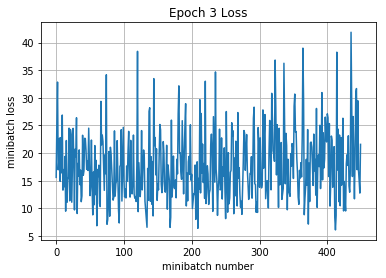

Iteration 1400: with minibatch training loss = 0.0743 and accuracy of 0.98
Iteration 1500: with minibatch training loss = 0.0615 and accuracy of 0.98
Iteration 1600: with minibatch training loss = 0.0814 and accuracy of 0.97
Iteration 1700: with minibatch training loss = 0.0858 and accuracy of 0.97
Epoch 4, Overall loss = 0.0879 and accuracy of 0.97


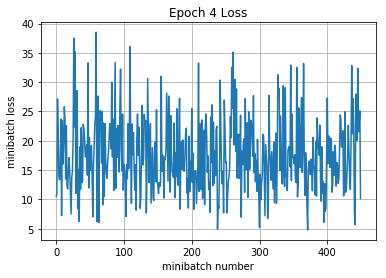

Iteration 1800: with minibatch training loss = 0.107 and accuracy of 0.96
Iteration 1900: with minibatch training loss = 0.0849 and accuracy of 0.96
Iteration 2000: with minibatch training loss = 0.0483 and accuracy of 0.98
Iteration 2100: with minibatch training loss = 0.0557 and accuracy of 0.98
Iteration 2200: with minibatch training loss = 0.0334 and accuracy of 0.99
Epoch 5, Overall loss = 0.0829 and accuracy of 0.972


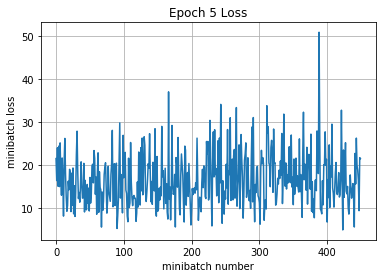

Validation6
Epoch 1, Overall loss = 1.1 and accuracy of 0.781
Training7
Iteration 0: with minibatch training loss = 0.0513 and accuracy of 0.98
Iteration 100: with minibatch training loss = 0.114 and accuracy of 0.96
Iteration 200: with minibatch training loss = 0.157 and accuracy of 0.95
Iteration 300: with minibatch training loss = 0.0933 and accuracy of 0.98
Iteration 400: with minibatch training loss = 0.0641 and accuracy of 0.97
Epoch 1, Overall loss = 0.0931 and accuracy of 0.969


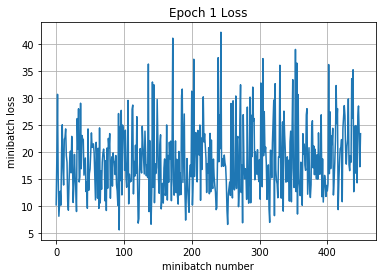

Iteration 500: with minibatch training loss = 0.135 and accuracy of 0.94
Iteration 600: with minibatch training loss = 0.0864 and accuracy of 0.97
Iteration 700: with minibatch training loss = 0.0683 and accuracy of 0.97
Iteration 800: with minibatch training loss = 0.0729 and accuracy of 0.98
Epoch 2, Overall loss = 0.0809 and accuracy of 0.972


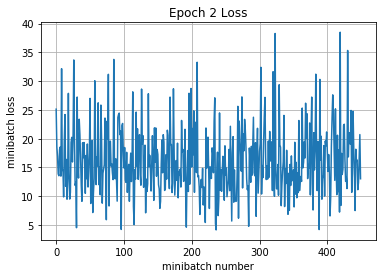

Iteration 900: with minibatch training loss = 0.071 and accuracy of 0.97
Iteration 1000: with minibatch training loss = 0.0888 and accuracy of 0.96
Iteration 1100: with minibatch training loss = 0.0607 and accuracy of 0.98
Iteration 1200: with minibatch training loss = 0.154 and accuracy of 0.96
Iteration 1300: with minibatch training loss = 0.0739 and accuracy of 0.97
Epoch 3, Overall loss = 0.0788 and accuracy of 0.974


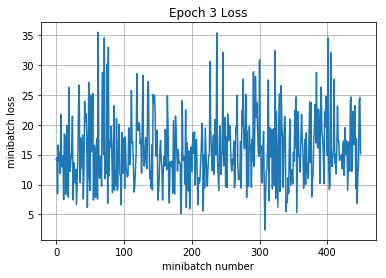

Iteration 1400: with minibatch training loss = 0.117 and accuracy of 0.97
Iteration 1500: with minibatch training loss = 0.0448 and accuracy of 0.99
Iteration 1600: with minibatch training loss = 0.0391 and accuracy of 0.99
Iteration 1700: with minibatch training loss = 0.102 and accuracy of 0.97
Epoch 4, Overall loss = 0.0779 and accuracy of 0.973


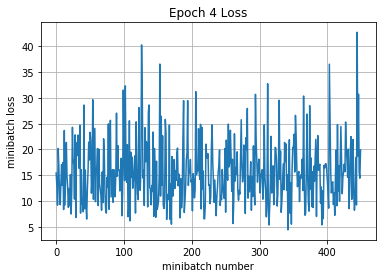

Iteration 1800: with minibatch training loss = 0.105 and accuracy of 0.95
Iteration 1900: with minibatch training loss = 0.0857 and accuracy of 0.97
Iteration 2000: with minibatch training loss = 0.0751 and accuracy of 0.97
Iteration 2100: with minibatch training loss = 0.103 and accuracy of 0.97
Iteration 2200: with minibatch training loss = 0.101 and accuracy of 0.96
Epoch 5, Overall loss = 0.0759 and accuracy of 0.974


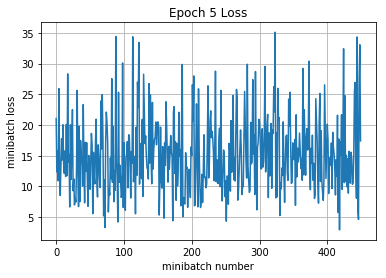

Validation7
Epoch 1, Overall loss = 1.1 and accuracy of 0.786
Training8
Iteration 0: with minibatch training loss = 0.106 and accuracy of 0.96
Iteration 100: with minibatch training loss = 0.0729 and accuracy of 0.98
Iteration 200: with minibatch training loss = 0.0984 and accuracy of 0.97
Iteration 300: with minibatch training loss = 0.118 and accuracy of 0.96
Iteration 400: with minibatch training loss = 0.111 and accuracy of 0.96
Epoch 1, Overall loss = 0.0779 and accuracy of 0.974


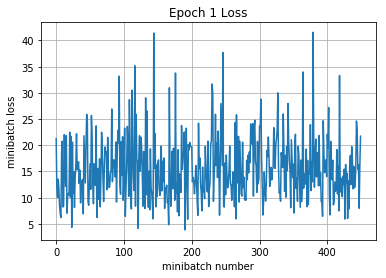

Iteration 500: with minibatch training loss = 0.0558 and accuracy of 0.98
Iteration 600: with minibatch training loss = 0.074 and accuracy of 0.97
Iteration 700: with minibatch training loss = 0.0373 and accuracy of 0.99
Iteration 800: with minibatch training loss = 0.061 and accuracy of 0.97
Epoch 2, Overall loss = 0.0734 and accuracy of 0.975


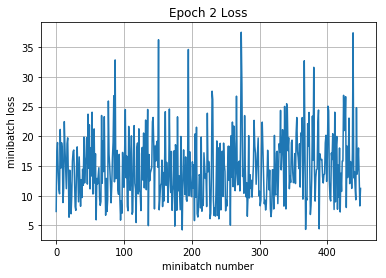

Iteration 900: with minibatch training loss = 0.0789 and accuracy of 0.96
Iteration 1000: with minibatch training loss = 0.049 and accuracy of 0.98
Iteration 1100: with minibatch training loss = 0.0649 and accuracy of 0.97
Iteration 1200: with minibatch training loss = 0.0654 and accuracy of 0.97
Iteration 1300: with minibatch training loss = 0.0972 and accuracy of 0.97
Epoch 3, Overall loss = 0.0701 and accuracy of 0.976


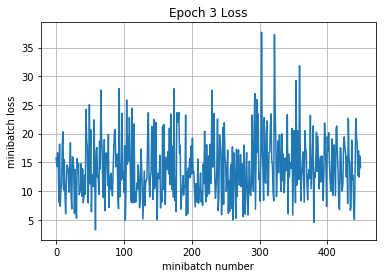

Iteration 1400: with minibatch training loss = 0.0581 and accuracy of 0.97
Iteration 1500: with minibatch training loss = 0.046 and accuracy of 0.99
Iteration 1600: with minibatch training loss = 0.0611 and accuracy of 0.96
Iteration 1700: with minibatch training loss = 0.0836 and accuracy of 0.98
Epoch 4, Overall loss = 0.0661 and accuracy of 0.977


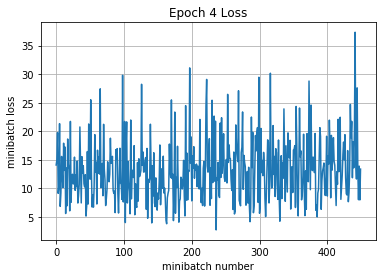

Iteration 1800: with minibatch training loss = 0.0677 and accuracy of 0.98
Iteration 1900: with minibatch training loss = 0.0779 and accuracy of 0.96
Iteration 2000: with minibatch training loss = 0.0549 and accuracy of 0.99
Iteration 2100: with minibatch training loss = 0.0758 and accuracy of 0.97
Iteration 2200: with minibatch training loss = 0.108 and accuracy of 0.95
Epoch 5, Overall loss = 0.0665 and accuracy of 0.978


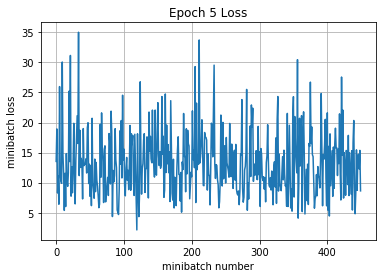

Validation8
Epoch 1, Overall loss = 1.2 and accuracy of 0.782
Training9
Iteration 0: with minibatch training loss = 0.107 and accuracy of 0.96
Iteration 100: with minibatch training loss = 0.098 and accuracy of 0.95
Iteration 200: with minibatch training loss = 0.0705 and accuracy of 0.98
Iteration 300: with minibatch training loss = 0.104 and accuracy of 0.97
Iteration 400: with minibatch training loss = 0.0508 and accuracy of 0.98
Epoch 1, Overall loss = 0.0725 and accuracy of 0.976


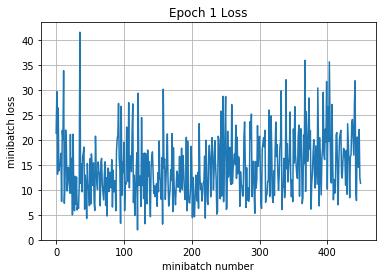

Iteration 500: with minibatch training loss = 0.097 and accuracy of 0.96
Iteration 600: with minibatch training loss = 0.0306 and accuracy of 0.99
Iteration 700: with minibatch training loss = 0.0406 and accuracy of 0.97
Iteration 800: with minibatch training loss = 0.0621 and accuracy of 0.97
Epoch 2, Overall loss = 0.0686 and accuracy of 0.977


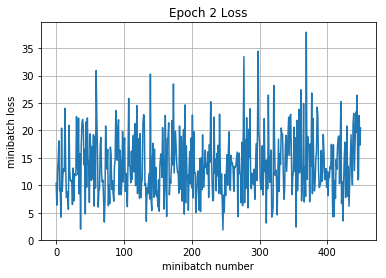

Iteration 900: with minibatch training loss = 0.031 and accuracy of 0.99
Iteration 1000: with minibatch training loss = 0.111 and accuracy of 0.94
Iteration 1100: with minibatch training loss = 0.0732 and accuracy of 0.97
Iteration 1200: with minibatch training loss = 0.0704 and accuracy of 0.98
Iteration 1300: with minibatch training loss = 0.052 and accuracy of 0.99
Epoch 3, Overall loss = 0.0658 and accuracy of 0.978


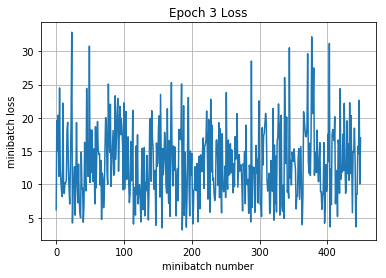

Iteration 1400: with minibatch training loss = 0.0941 and accuracy of 0.96
Iteration 1500: with minibatch training loss = 0.0591 and accuracy of 0.96
Iteration 1600: with minibatch training loss = 0.0789 and accuracy of 0.98
Iteration 1700: with minibatch training loss = 0.0855 and accuracy of 0.96
Epoch 4, Overall loss = 0.0637 and accuracy of 0.979


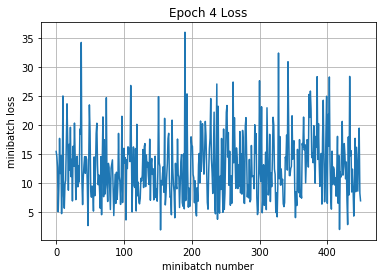

Iteration 1800: with minibatch training loss = 0.0429 and accuracy of 0.98
Iteration 1900: with minibatch training loss = 0.125 and accuracy of 0.95
Iteration 2000: with minibatch training loss = 0.0263 and accuracy of 0.99
Iteration 2100: with minibatch training loss = 0.0656 and accuracy of 0.97
Iteration 2200: with minibatch training loss = 0.0707 and accuracy of 0.98
Epoch 5, Overall loss = 0.0611 and accuracy of 0.98


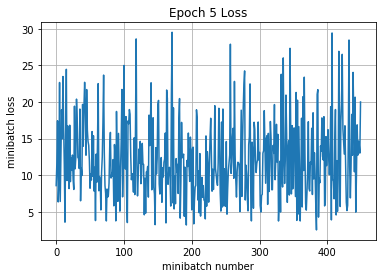

Validation9
Epoch 1, Overall loss = 1.14 and accuracy of 0.792
Training10
Iteration 0: with minibatch training loss = 0.0521 and accuracy of 0.98
Iteration 100: with minibatch training loss = 0.0575 and accuracy of 0.97
Iteration 200: with minibatch training loss = 0.0498 and accuracy of 0.98
Iteration 300: with minibatch training loss = 0.0578 and accuracy of 0.97
Iteration 400: with minibatch training loss = 0.135 and accuracy of 0.96
Epoch 1, Overall loss = 0.0672 and accuracy of 0.978


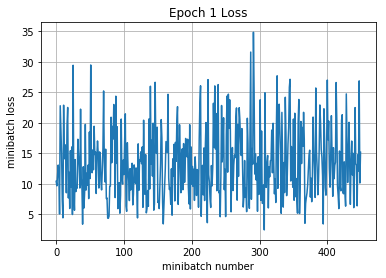

Iteration 500: with minibatch training loss = 0.0635 and accuracy of 0.97
Iteration 600: with minibatch training loss = 0.0427 and accuracy of 0.98
Iteration 700: with minibatch training loss = 0.0335 and accuracy of 0.98
Iteration 800: with minibatch training loss = 0.0563 and accuracy of 0.97
Epoch 2, Overall loss = 0.0613 and accuracy of 0.979


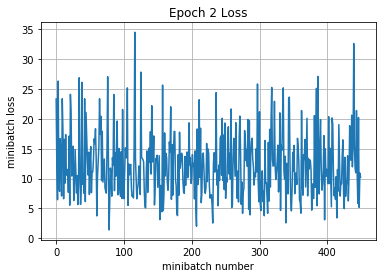

Iteration 900: with minibatch training loss = 0.126 and accuracy of 0.97
Iteration 1000: with minibatch training loss = 0.0768 and accuracy of 0.97
Iteration 1100: with minibatch training loss = 0.0508 and accuracy of 0.98
Iteration 1200: with minibatch training loss = 0.137 and accuracy of 0.95
Iteration 1300: with minibatch training loss = 0.0842 and accuracy of 0.96
Epoch 3, Overall loss = 0.0622 and accuracy of 0.979


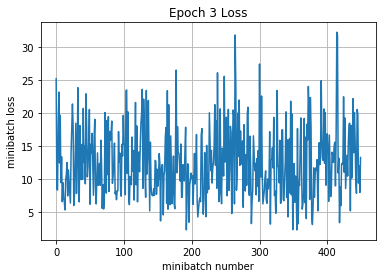

Iteration 1400: with minibatch training loss = 0.0707 and accuracy of 0.96
Iteration 1500: with minibatch training loss = 0.0425 and accuracy of 0.98
Iteration 1600: with minibatch training loss = 0.0214 and accuracy of 0.99
Iteration 1700: with minibatch training loss = 0.0614 and accuracy of 0.98
Epoch 4, Overall loss = 0.0571 and accuracy of 0.981


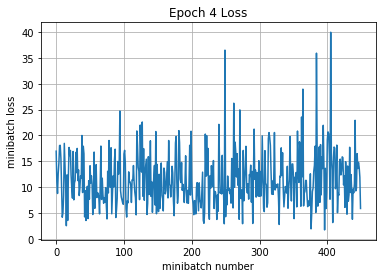

Iteration 1800: with minibatch training loss = 0.063 and accuracy of 0.99
Iteration 1900: with minibatch training loss = 0.0448 and accuracy of 0.99
Iteration 2000: with minibatch training loss = 0.0597 and accuracy of 0.97
Iteration 2100: with minibatch training loss = 0.0471 and accuracy of 0.98
Iteration 2200: with minibatch training loss = 0.0794 and accuracy of 0.97
Epoch 5, Overall loss = 0.057 and accuracy of 0.981


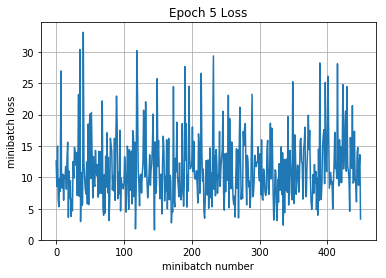

Validation10
Epoch 1, Overall loss = 1.22 and accuracy of 0.785
Training11
Iteration 0: with minibatch training loss = 0.0792 and accuracy of 0.95
Iteration 100: with minibatch training loss = 0.0608 and accuracy of 0.97
Iteration 200: with minibatch training loss = 0.051 and accuracy of 0.98
Iteration 300: with minibatch training loss = 0.0752 and accuracy of 0.99
Iteration 400: with minibatch training loss = 0.0897 and accuracy of 0.96
Epoch 1, Overall loss = 0.0632 and accuracy of 0.979


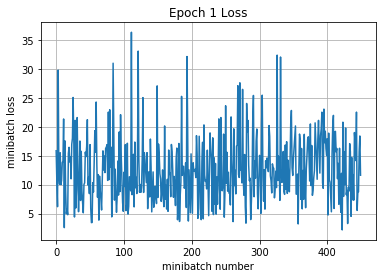

Iteration 500: with minibatch training loss = 0.0482 and accuracy of 0.97
Iteration 600: with minibatch training loss = 0.0732 and accuracy of 0.97
Iteration 700: with minibatch training loss = 0.0708 and accuracy of 0.97
Iteration 800: with minibatch training loss = 0.0441 and accuracy of 0.98
Epoch 2, Overall loss = 0.0565 and accuracy of 0.981


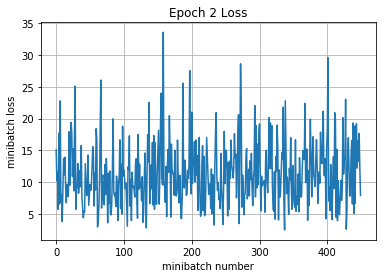

Iteration 900: with minibatch training loss = 0.0414 and accuracy of 0.98
Iteration 1000: with minibatch training loss = 0.0143 and accuracy of 1
Iteration 1100: with minibatch training loss = 0.0519 and accuracy of 0.98
Iteration 1200: with minibatch training loss = 0.0808 and accuracy of 0.95
Iteration 1300: with minibatch training loss = 0.0374 and accuracy of 0.99
Epoch 3, Overall loss = 0.0557 and accuracy of 0.981


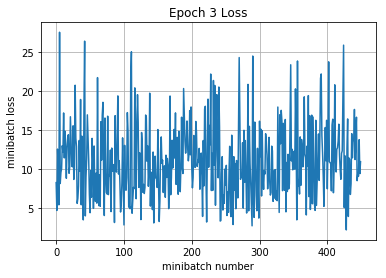

Iteration 1400: with minibatch training loss = 0.0852 and accuracy of 0.96
Iteration 1500: with minibatch training loss = 0.0332 and accuracy of 0.98
Iteration 1600: with minibatch training loss = 0.0362 and accuracy of 0.98
Iteration 1700: with minibatch training loss = 0.0334 and accuracy of 0.98
Epoch 4, Overall loss = 0.0552 and accuracy of 0.981


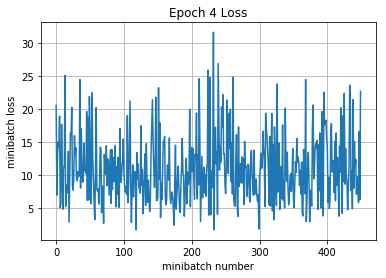

Iteration 1800: with minibatch training loss = 0.0439 and accuracy of 0.98
Iteration 1900: with minibatch training loss = 0.0562 and accuracy of 0.98
Iteration 2000: with minibatch training loss = 0.0251 and accuracy of 0.99
Iteration 2100: with minibatch training loss = 0.0363 and accuracy of 0.98
Iteration 2200: with minibatch training loss = 0.0795 and accuracy of 0.98
Epoch 5, Overall loss = 0.0517 and accuracy of 0.983


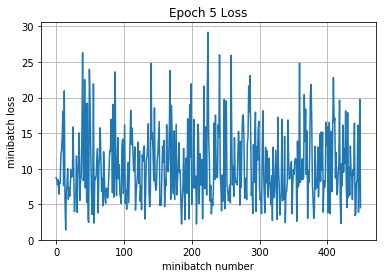

Validation11
Epoch 1, Overall loss = 1.2 and accuracy of 0.79
Training12
Iteration 0: with minibatch training loss = 0.0346 and accuracy of 0.98
Iteration 100: with minibatch training loss = 0.0685 and accuracy of 0.98
Iteration 200: with minibatch training loss = 0.0674 and accuracy of 0.98
Iteration 300: with minibatch training loss = 0.0444 and accuracy of 0.98
Iteration 400: with minibatch training loss = 0.126 and accuracy of 0.96
Epoch 1, Overall loss = 0.0593 and accuracy of 0.98


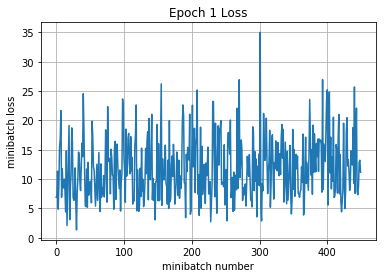

Iteration 500: with minibatch training loss = 0.051 and accuracy of 0.96
Iteration 600: with minibatch training loss = 0.0192 and accuracy of 0.99
Iteration 700: with minibatch training loss = 0.112 and accuracy of 0.96
Iteration 800: with minibatch training loss = 0.0666 and accuracy of 0.97
Epoch 2, Overall loss = 0.0536 and accuracy of 0.982


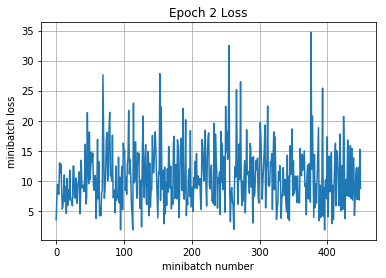

Iteration 900: with minibatch training loss = 0.0652 and accuracy of 0.97
Iteration 1000: with minibatch training loss = 0.081 and accuracy of 0.97
Iteration 1100: with minibatch training loss = 0.0676 and accuracy of 0.97
Iteration 1200: with minibatch training loss = 0.0561 and accuracy of 0.98
Iteration 1300: with minibatch training loss = 0.0907 and accuracy of 0.97
Epoch 3, Overall loss = 0.0518 and accuracy of 0.983


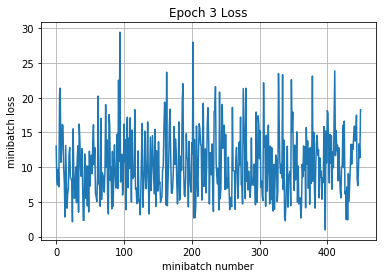

Iteration 1400: with minibatch training loss = 0.0353 and accuracy of 0.98
Iteration 1500: with minibatch training loss = 0.0303 and accuracy of 0.99
Iteration 1600: with minibatch training loss = 0.094 and accuracy of 0.98
Iteration 1700: with minibatch training loss = 0.0948 and accuracy of 0.96
Epoch 4, Overall loss = 0.0509 and accuracy of 0.983


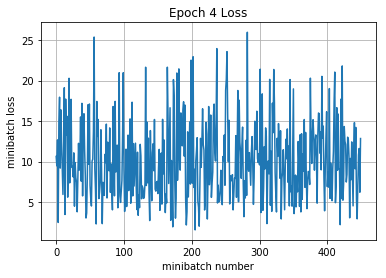

Iteration 1800: with minibatch training loss = 0.0245 and accuracy of 0.99
Iteration 1900: with minibatch training loss = 0.0338 and accuracy of 0.98
Iteration 2000: with minibatch training loss = 0.0374 and accuracy of 0.99
Iteration 2100: with minibatch training loss = 0.0682 and accuracy of 0.98
Iteration 2200: with minibatch training loss = 0.0518 and accuracy of 0.97
Epoch 5, Overall loss = 0.0496 and accuracy of 0.983


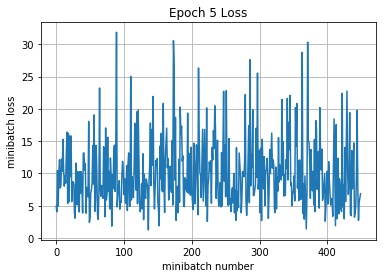

Validation12
Epoch 1, Overall loss = 1.23 and accuracy of 0.785
Training13
Iteration 0: with minibatch training loss = 0.0989 and accuracy of 0.96
Iteration 100: with minibatch training loss = 0.03 and accuracy of 0.98
Iteration 200: with minibatch training loss = 0.0719 and accuracy of 0.96
Iteration 300: with minibatch training loss = 0.0312 and accuracy of 0.98
Iteration 400: with minibatch training loss = 0.038 and accuracy of 0.98
Epoch 1, Overall loss = 0.0511 and accuracy of 0.983


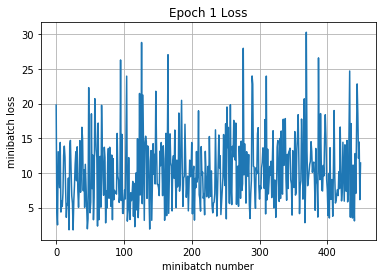

Iteration 500: with minibatch training loss = 0.0404 and accuracy of 0.99
Iteration 600: with minibatch training loss = 0.0783 and accuracy of 0.98
Iteration 700: with minibatch training loss = 0.0724 and accuracy of 0.97
Iteration 800: with minibatch training loss = 0.0492 and accuracy of 0.98
Epoch 2, Overall loss = 0.0521 and accuracy of 0.983


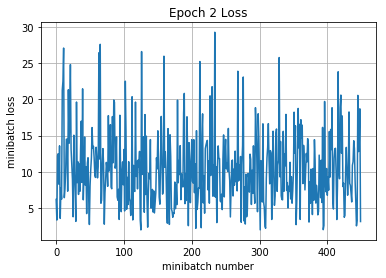

Iteration 900: with minibatch training loss = 0.0415 and accuracy of 0.99
Iteration 1000: with minibatch training loss = 0.0634 and accuracy of 0.98
Iteration 1100: with minibatch training loss = 0.0586 and accuracy of 0.99
Iteration 1200: with minibatch training loss = 0.0431 and accuracy of 0.99
Iteration 1300: with minibatch training loss = 0.0325 and accuracy of 0.98
Epoch 3, Overall loss = 0.0484 and accuracy of 0.984


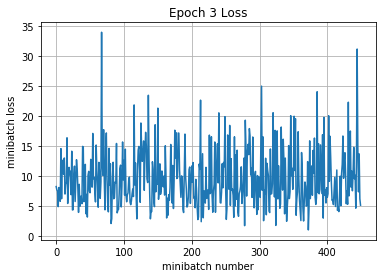

Iteration 1400: with minibatch training loss = 0.0464 and accuracy of 0.98
Iteration 1500: with minibatch training loss = 0.0601 and accuracy of 0.98
Iteration 1600: with minibatch training loss = 0.0368 and accuracy of 0.99
Iteration 1700: with minibatch training loss = 0.0726 and accuracy of 0.96
Epoch 4, Overall loss = 0.0458 and accuracy of 0.984


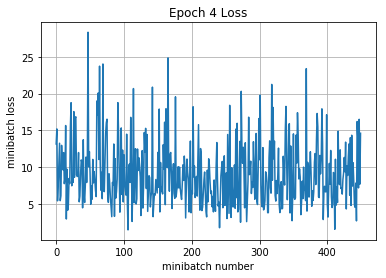

Iteration 1800: with minibatch training loss = 0.0554 and accuracy of 0.98
Iteration 1900: with minibatch training loss = 0.027 and accuracy of 0.99
Iteration 2000: with minibatch training loss = 0.0473 and accuracy of 0.98
Iteration 2100: with minibatch training loss = 0.0364 and accuracy of 0.99
Iteration 2200: with minibatch training loss = 0.055 and accuracy of 0.98
Epoch 5, Overall loss = 0.0463 and accuracy of 0.984


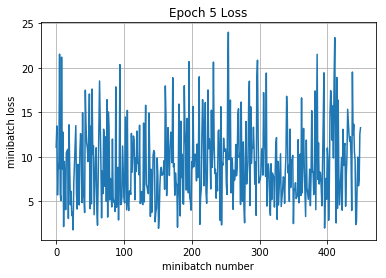

Validation13
Epoch 1, Overall loss = 1.31 and accuracy of 0.778
Training14
Iteration 0: with minibatch training loss = 0.0645 and accuracy of 0.99
Iteration 100: with minibatch training loss = 0.0271 and accuracy of 0.99
Iteration 200: with minibatch training loss = 0.0541 and accuracy of 0.98
Iteration 300: with minibatch training loss = 0.0152 and accuracy of 0.99
Iteration 400: with minibatch training loss = 0.0431 and accuracy of 0.98
Epoch 1, Overall loss = 0.0522 and accuracy of 0.983


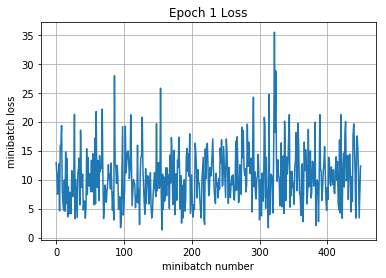

Iteration 500: with minibatch training loss = 0.0224 and accuracy of 0.99
Iteration 600: with minibatch training loss = 0.0408 and accuracy of 0.98
Iteration 700: with minibatch training loss = 0.0337 and accuracy of 0.98
Iteration 800: with minibatch training loss = 0.0713 and accuracy of 0.97
Epoch 2, Overall loss = 0.0473 and accuracy of 0.984


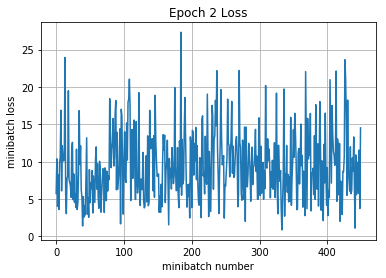

Iteration 900: with minibatch training loss = 0.0303 and accuracy of 0.98
Iteration 1000: with minibatch training loss = 0.00866 and accuracy of 1
Iteration 1100: with minibatch training loss = 0.0271 and accuracy of 0.99
Iteration 1200: with minibatch training loss = 0.0314 and accuracy of 0.99
Iteration 1300: with minibatch training loss = 0.126 and accuracy of 0.96
Epoch 3, Overall loss = 0.0458 and accuracy of 0.985


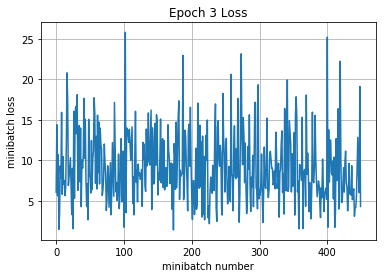

Iteration 1400: with minibatch training loss = 0.009 and accuracy of 1
Iteration 1500: with minibatch training loss = 0.0348 and accuracy of 0.98
Iteration 1600: with minibatch training loss = 0.0343 and accuracy of 0.99
Iteration 1700: with minibatch training loss = 0.0672 and accuracy of 0.97
Epoch 4, Overall loss = 0.0441 and accuracy of 0.985


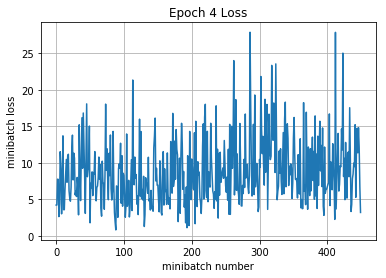

Iteration 1800: with minibatch training loss = 0.0694 and accuracy of 0.97
Iteration 1900: with minibatch training loss = 0.0305 and accuracy of 0.99
Iteration 2000: with minibatch training loss = 0.0157 and accuracy of 0.99
Iteration 2100: with minibatch training loss = 0.0278 and accuracy of 0.99
Iteration 2200: with minibatch training loss = 0.0612 and accuracy of 0.97
Epoch 5, Overall loss = 0.0427 and accuracy of 0.985


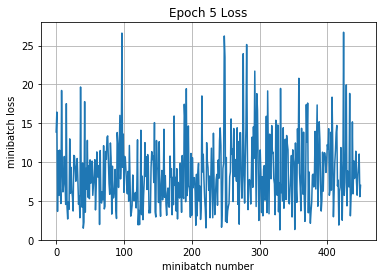

Validation14
Epoch 1, Overall loss = 1.33 and accuracy of 0.78
Training15
Iteration 0: with minibatch training loss = 0.03 and accuracy of 0.99
Iteration 100: with minibatch training loss = 0.0308 and accuracy of 0.99
Iteration 200: with minibatch training loss = 0.0601 and accuracy of 0.98
Iteration 300: with minibatch training loss = 0.0615 and accuracy of 0.97
Iteration 400: with minibatch training loss = 0.041 and accuracy of 0.98
Epoch 1, Overall loss = 0.0501 and accuracy of 0.983


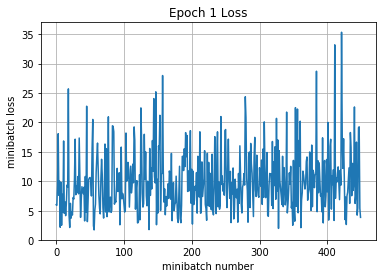

Iteration 500: with minibatch training loss = 0.0327 and accuracy of 0.99
Iteration 600: with minibatch training loss = 0.0615 and accuracy of 0.98
Iteration 700: with minibatch training loss = 0.0596 and accuracy of 0.98
Iteration 800: with minibatch training loss = 0.0211 and accuracy of 0.99
Epoch 2, Overall loss = 0.0464 and accuracy of 0.985


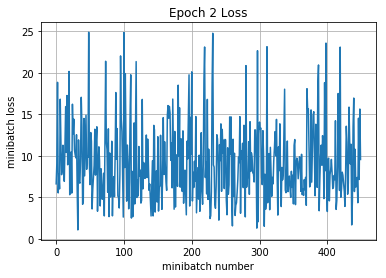

Iteration 900: with minibatch training loss = 0.0439 and accuracy of 0.98
Iteration 1000: with minibatch training loss = 0.0139 and accuracy of 1
Iteration 1100: with minibatch training loss = 0.0253 and accuracy of 0.98
Iteration 1200: with minibatch training loss = 0.0258 and accuracy of 0.99
Iteration 1300: with minibatch training loss = 0.083 and accuracy of 0.97
Epoch 3, Overall loss = 0.0435 and accuracy of 0.985


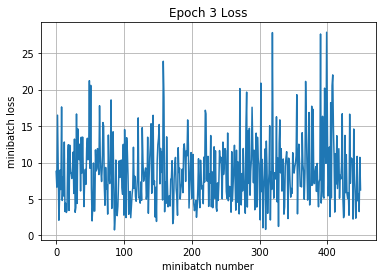

Iteration 1400: with minibatch training loss = 0.0929 and accuracy of 0.97
Iteration 1500: with minibatch training loss = 0.0199 and accuracy of 1
Iteration 1600: with minibatch training loss = 0.0131 and accuracy of 1
Iteration 1700: with minibatch training loss = 0.0831 and accuracy of 0.98
Epoch 4, Overall loss = 0.039 and accuracy of 0.987


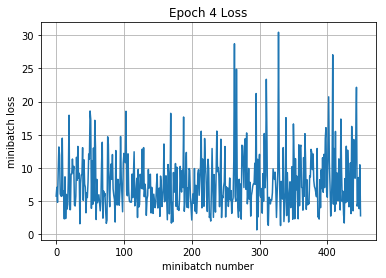

Iteration 1800: with minibatch training loss = 0.0366 and accuracy of 0.98
Iteration 1900: with minibatch training loss = 0.0287 and accuracy of 0.99
Iteration 2000: with minibatch training loss = 0.0569 and accuracy of 0.97
Iteration 2100: with minibatch training loss = 0.0257 and accuracy of 0.99
Iteration 2200: with minibatch training loss = 0.0257 and accuracy of 0.99
Epoch 5, Overall loss = 0.0415 and accuracy of 0.986


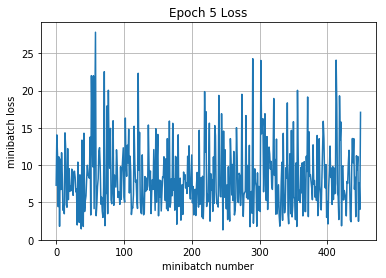

Validation15
Epoch 1, Overall loss = 1.42 and accuracy of 0.772
Training16
Iteration 0: with minibatch training loss = 0.0283 and accuracy of 0.99
Iteration 100: with minibatch training loss = 0.0179 and accuracy of 0.99
Iteration 200: with minibatch training loss = 0.0459 and accuracy of 0.99
Iteration 300: with minibatch training loss = 0.0491 and accuracy of 0.97
Iteration 400: with minibatch training loss = 0.035 and accuracy of 0.98
Epoch 1, Overall loss = 0.0454 and accuracy of 0.985


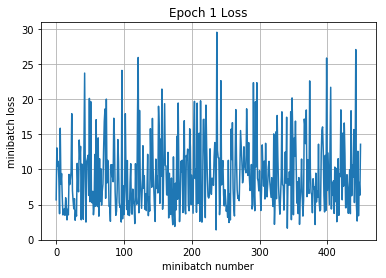

Iteration 500: with minibatch training loss = 0.051 and accuracy of 0.98
Iteration 600: with minibatch training loss = 0.0146 and accuracy of 1
Iteration 700: with minibatch training loss = 0.0343 and accuracy of 0.98
Iteration 800: with minibatch training loss = 0.0262 and accuracy of 0.99
Epoch 2, Overall loss = 0.042 and accuracy of 0.986


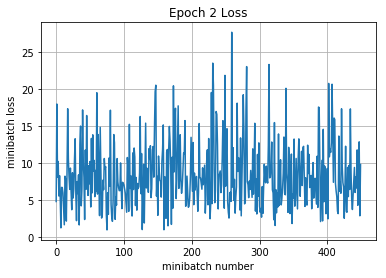

Iteration 900: with minibatch training loss = 0.0116 and accuracy of 1
Iteration 1000: with minibatch training loss = 0.0274 and accuracy of 0.99
Iteration 1100: with minibatch training loss = 0.026 and accuracy of 0.99
Iteration 1200: with minibatch training loss = 0.0483 and accuracy of 0.98
Iteration 1300: with minibatch training loss = 0.073 and accuracy of 0.97
Epoch 3, Overall loss = 0.0401 and accuracy of 0.987


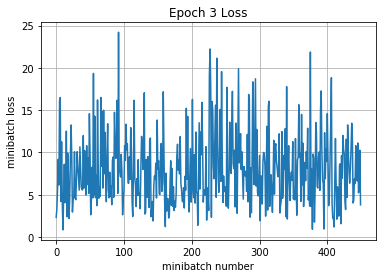

Iteration 1400: with minibatch training loss = 0.035 and accuracy of 0.98
Iteration 1500: with minibatch training loss = 0.057 and accuracy of 0.99
Iteration 1600: with minibatch training loss = 0.0146 and accuracy of 0.99
Iteration 1700: with minibatch training loss = 0.0176 and accuracy of 0.99
Epoch 4, Overall loss = 0.0401 and accuracy of 0.987


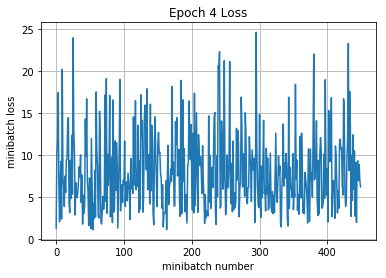

Iteration 1800: with minibatch training loss = 0.0181 and accuracy of 0.99
Iteration 1900: with minibatch training loss = 0.0324 and accuracy of 0.99
Iteration 2000: with minibatch training loss = 0.0479 and accuracy of 0.97
Iteration 2100: with minibatch training loss = 0.0493 and accuracy of 0.98
Iteration 2200: with minibatch training loss = 0.041 and accuracy of 0.98
Epoch 5, Overall loss = 0.0408 and accuracy of 0.987


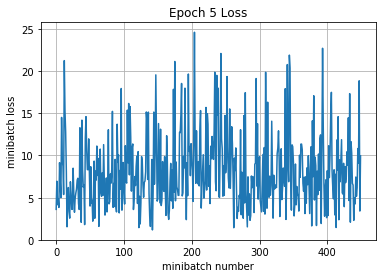

Validation16
Epoch 1, Overall loss = 1.28 and accuracy of 0.781
Training17
Iteration 0: with minibatch training loss = 0.0396 and accuracy of 0.99
Iteration 100: with minibatch training loss = 0.041 and accuracy of 0.97
Iteration 200: with minibatch training loss = 0.0212 and accuracy of 0.99
Iteration 300: with minibatch training loss = 0.0496 and accuracy of 0.97
Iteration 400: with minibatch training loss = 0.0178 and accuracy of 0.99
Epoch 1, Overall loss = 0.0438 and accuracy of 0.985


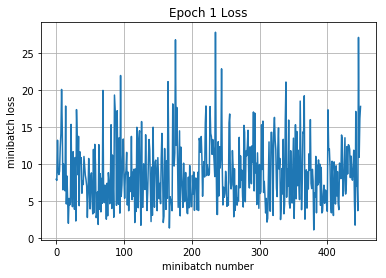

Iteration 500: with minibatch training loss = 0.0331 and accuracy of 0.99
Iteration 600: with minibatch training loss = 0.0189 and accuracy of 1
Iteration 700: with minibatch training loss = 0.0552 and accuracy of 0.98
Iteration 800: with minibatch training loss = 0.05 and accuracy of 0.99
Epoch 2, Overall loss = 0.0404 and accuracy of 0.987


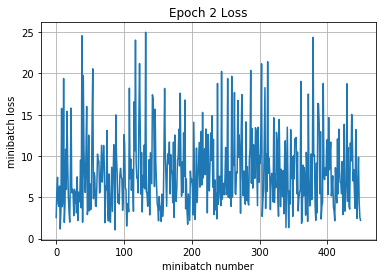

Iteration 900: with minibatch training loss = 0.0144 and accuracy of 0.99
Iteration 1000: with minibatch training loss = 0.047 and accuracy of 0.98
Iteration 1100: with minibatch training loss = 0.0288 and accuracy of 0.99
Iteration 1200: with minibatch training loss = 0.00775 and accuracy of 1
Iteration 1300: with minibatch training loss = 0.0189 and accuracy of 0.99
Epoch 3, Overall loss = 0.039 and accuracy of 0.987


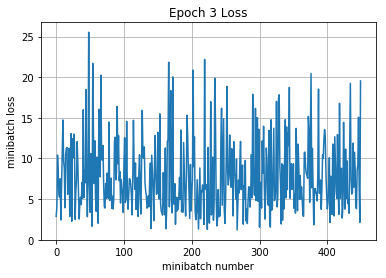

Iteration 1400: with minibatch training loss = 0.0346 and accuracy of 0.99
Iteration 1500: with minibatch training loss = 0.0221 and accuracy of 0.98
Iteration 1600: with minibatch training loss = 0.0615 and accuracy of 0.97
Iteration 1700: with minibatch training loss = 0.0434 and accuracy of 0.97
Epoch 4, Overall loss = 0.038 and accuracy of 0.987


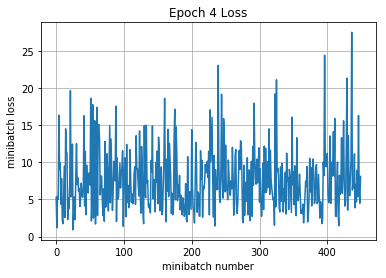

Iteration 1800: with minibatch training loss = 0.119 and accuracy of 0.97
Iteration 1900: with minibatch training loss = 0.0451 and accuracy of 0.98
Iteration 2000: with minibatch training loss = 0.0279 and accuracy of 0.99
Iteration 2100: with minibatch training loss = 0.0153 and accuracy of 1
Iteration 2200: with minibatch training loss = 0.0451 and accuracy of 0.98
Epoch 5, Overall loss = 0.0384 and accuracy of 0.987


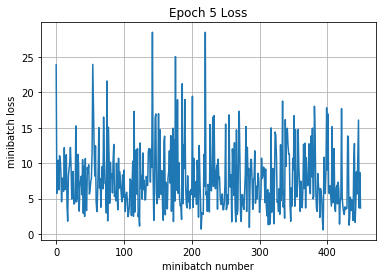

Validation17
Epoch 1, Overall loss = 1.33 and accuracy of 0.786
Training18
Iteration 0: with minibatch training loss = 0.0435 and accuracy of 0.99
Iteration 100: with minibatch training loss = 0.0621 and accuracy of 0.99
Iteration 200: with minibatch training loss = 0.0485 and accuracy of 0.98
Iteration 300: with minibatch training loss = 0.055 and accuracy of 0.98
Iteration 400: with minibatch training loss = 0.0171 and accuracy of 0.99
Epoch 1, Overall loss = 0.0438 and accuracy of 0.986


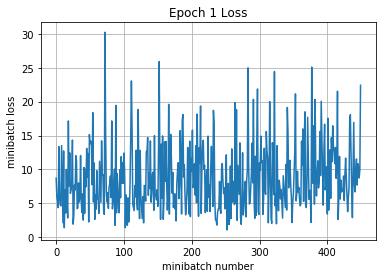

Iteration 500: with minibatch training loss = 0.0336 and accuracy of 0.99
Iteration 600: with minibatch training loss = 0.0476 and accuracy of 0.99
Iteration 700: with minibatch training loss = 0.0124 and accuracy of 0.99
Iteration 800: with minibatch training loss = 0.0404 and accuracy of 0.98
Epoch 2, Overall loss = 0.0386 and accuracy of 0.987


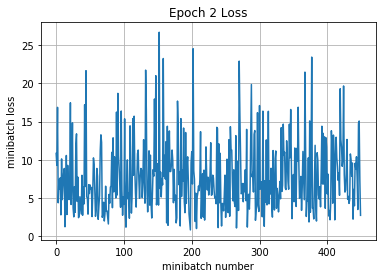

Iteration 900: with minibatch training loss = 0.0112 and accuracy of 1
Iteration 1000: with minibatch training loss = 0.0292 and accuracy of 0.98
Iteration 1100: with minibatch training loss = 0.0134 and accuracy of 0.99
Iteration 1200: with minibatch training loss = 0.0299 and accuracy of 0.99
Iteration 1300: with minibatch training loss = 0.0251 and accuracy of 0.99
Epoch 3, Overall loss = 0.0373 and accuracy of 0.987


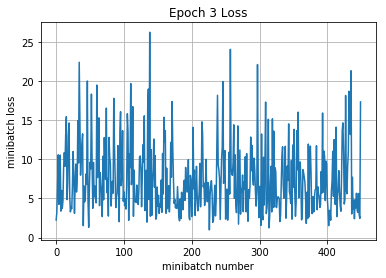

Iteration 1400: with minibatch training loss = 0.0378 and accuracy of 0.98
Iteration 1500: with minibatch training loss = 0.06 and accuracy of 0.97
Iteration 1600: with minibatch training loss = 0.0181 and accuracy of 0.99
Iteration 1700: with minibatch training loss = 0.0488 and accuracy of 0.98
Epoch 4, Overall loss = 0.0353 and accuracy of 0.988


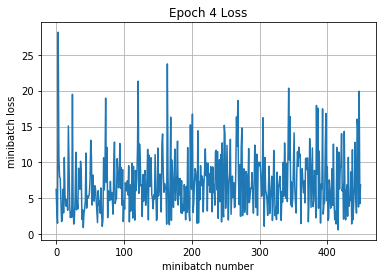

Iteration 1800: with minibatch training loss = 0.0227 and accuracy of 0.99
Iteration 1900: with minibatch training loss = 0.013 and accuracy of 1
Iteration 2000: with minibatch training loss = 0.0157 and accuracy of 1
Iteration 2100: with minibatch training loss = 0.0273 and accuracy of 0.98
Iteration 2200: with minibatch training loss = 0.0389 and accuracy of 0.99
Epoch 5, Overall loss = 0.036 and accuracy of 0.988


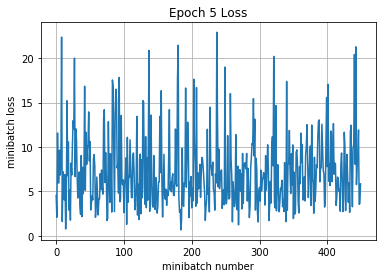

Validation18
Epoch 1, Overall loss = 1.44 and accuracy of 0.785
Training19
Iteration 0: with minibatch training loss = 0.0223 and accuracy of 0.99
Iteration 100: with minibatch training loss = 0.0551 and accuracy of 0.98
Iteration 200: with minibatch training loss = 0.0275 and accuracy of 0.99
Iteration 300: with minibatch training loss = 0.0565 and accuracy of 0.98
Iteration 400: with minibatch training loss = 0.0658 and accuracy of 0.97
Epoch 1, Overall loss = 0.0395 and accuracy of 0.987


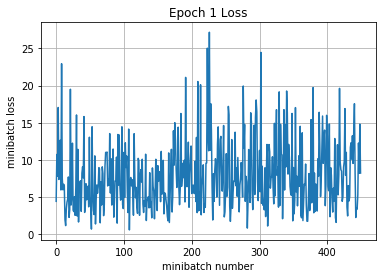

Iteration 500: with minibatch training loss = 0.0251 and accuracy of 0.98
Iteration 600: with minibatch training loss = 0.0333 and accuracy of 0.98
Iteration 700: with minibatch training loss = 0.0866 and accuracy of 0.97
Iteration 800: with minibatch training loss = 0.0364 and accuracy of 0.98
Epoch 2, Overall loss = 0.0372 and accuracy of 0.988


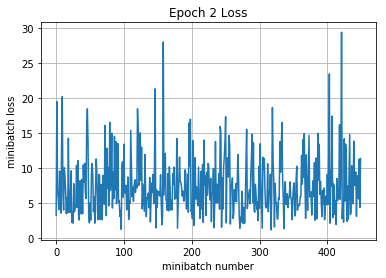

Iteration 900: with minibatch training loss = 0.0453 and accuracy of 0.99
Iteration 1000: with minibatch training loss = 0.0214 and accuracy of 0.99
Iteration 1100: with minibatch training loss = 0.0288 and accuracy of 0.99
Iteration 1200: with minibatch training loss = 0.00571 and accuracy of 1
Iteration 1300: with minibatch training loss = 0.0618 and accuracy of 0.97
Epoch 3, Overall loss = 0.0352 and accuracy of 0.988


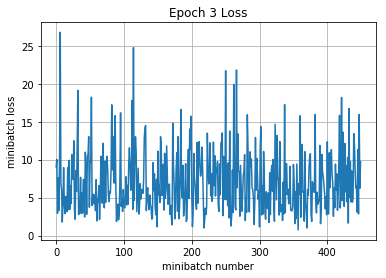

Iteration 1400: with minibatch training loss = 0.0163 and accuracy of 0.99
Iteration 1500: with minibatch training loss = 0.0196 and accuracy of 0.99
Iteration 1600: with minibatch training loss = 0.0225 and accuracy of 0.99
Iteration 1700: with minibatch training loss = 0.0502 and accuracy of 0.98
Epoch 4, Overall loss = 0.0365 and accuracy of 0.988


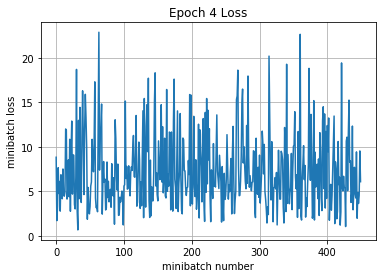

Iteration 1800: with minibatch training loss = 0.0214 and accuracy of 0.99
Iteration 1900: with minibatch training loss = 0.0528 and accuracy of 0.98
Iteration 2000: with minibatch training loss = 0.073 and accuracy of 0.98
Iteration 2100: with minibatch training loss = 0.0119 and accuracy of 0.99
Iteration 2200: with minibatch training loss = 0.0612 and accuracy of 0.98
Epoch 5, Overall loss = 0.0345 and accuracy of 0.988


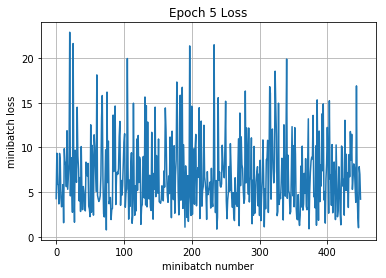

Validation19
Epoch 1, Overall loss = 1.33 and accuracy of 0.788


In [32]:
# train with 10 epochs
sess = tf.Session()

try:
    with tf.device("/cpu:0") as dev:
        sess.run(tf.global_variables_initializer())
        for i in range(20):
            print('Training'+str(i))
            net.run(sess, mean_loss, X_train, y_train, 5, 200, 100, train_step, True)
            print('Validation'+str(i))
            net.run(sess, mean_loss, X_val, y_val, 1, 64)
except tf.errors.InvalidArgumentError:
    print("no gpu found, please use Google Cloud if you want GPU acceleration") 

In [57]:
# create a feed dictionary for this batch
feed_dict1 = {X: X_val[:2500],
             y: y_val[:2500],
             is_training: False}

# predict
predict = sess.run(tf.nn.softmax(net.predict), feed_dict=feed_dict1)
y_pred1 = sess.run(net.predict, feed_dict=feed_dict1)
p = np.argmax(predict, axis=1)


In [58]:
# create a feed dictionary for this batch
feed_dict2 = {X: X_val[2500:],
             y: y_val[2500:],
             is_training: False}

# predict
predict1 = sess.run(tf.nn.softmax(net.predict), feed_dict=feed_dict2)
y_pred2=sess.run(net.predict, feed_dict=feed_dict2)
p1 = np.argmax(predict1, axis=1)

In [59]:
pre = np.concatenate((p,p1))
y_pout=np.concatenate((y_pred1,y_pred2)).T

In [60]:
plist = []
for i in range(5000):
    plist.append(classes[pre[i]])
    
predict_df = pd.DataFrame(plist, columns=['label'])

predict_df.head(10)

predict_csv = pd.DataFrame.to_csv(predict_df, index_label = 'id')

with open('e://python3/predict_csv.csv', 'w') as f:
    f.write(predict_csv)

In [61]:
def save_predictions(filename, y):
    """
    Dumps y into .npy file
    """
    np.save(filename, y)

In [62]:
save_predictions('ans1-lw2435', y_pout)

In [63]:
# test if your numpy file has been saved correctly
loaded_y = np.load('ans1-lw2435.npy')
print(loaded_y.shape)
loaded_y[:10]

(10, 5000)


array([[-28.874004  , -24.550083  ,   2.5778952 , ...,   7.2735596 ,
        -15.991212  ,   2.8715014 ],
       [-22.921862  ,  23.204227  , -13.2741    , ...,  -4.038106  ,
         27.356316  ,   5.2350745 ],
       [-27.179266  , -13.602451  ,   0.86192036, ..., -13.397906  ,
        -32.479496  , -11.729051  ],
       ...,
       [ 25.260218  , -12.671072  ,  -1.0233918 , ..., -14.011773  ,
        -39.622234  ,  -7.1678433 ],
       [-40.423023  , -18.425772  , -15.009953  , ...,   2.0881457 ,
          8.279496  ,   0.983138  ],
       [-25.7715    ,  -6.5976195 ,  -8.145785  , ...,   6.4268675 ,
         -2.8418665 , -10.920178  ]], dtype=float32)